In [41]:
# pip install pandas_datareader

In [42]:
import numpy as np
import pandas as pd
import math
import matplotlib
from matplotlib import pyplot as plt
import pandas_datareader as pdr
import datetime as dt

%config InlineBackend.figure_format = 'retina'

### Load Data

In [43]:
# 12-12-1980
start = dt.datetime(2020, 8, 7)
end = dt.datetime(2021, 4, 16)
# end = dt.datetime.now()
df = pdr.get_data_yahoo("AAPL", start, end)
# ['Adj Close']
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-07,113.675003,110.292503,113.205002,111.112503,198045600.0,110.755638
2020-08-10,113.775002,110.000000,112.599998,112.727501,212403600.0,112.365448
2020-08-11,112.482498,109.107498,111.970001,109.375000,187902400.0,109.023705
2020-08-12,113.275002,110.297501,110.497498,113.010002,165944800.0,112.647041
2020-08-13,116.042503,113.927498,114.430000,115.010002,210082000.0,114.640610


## Calculate the metrics

In [44]:
shortEMA = df["Open"].ewm(span=12, adjust=False).mean()
longEMA = df["Open"].ewm(span=26, adjust=False).mean()

macd = shortEMA - longEMA

signal = macd.ewm(span=9, adjust=False).mean()

## Vidualizing

/Users/Reinhard/opt/anaconda3/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


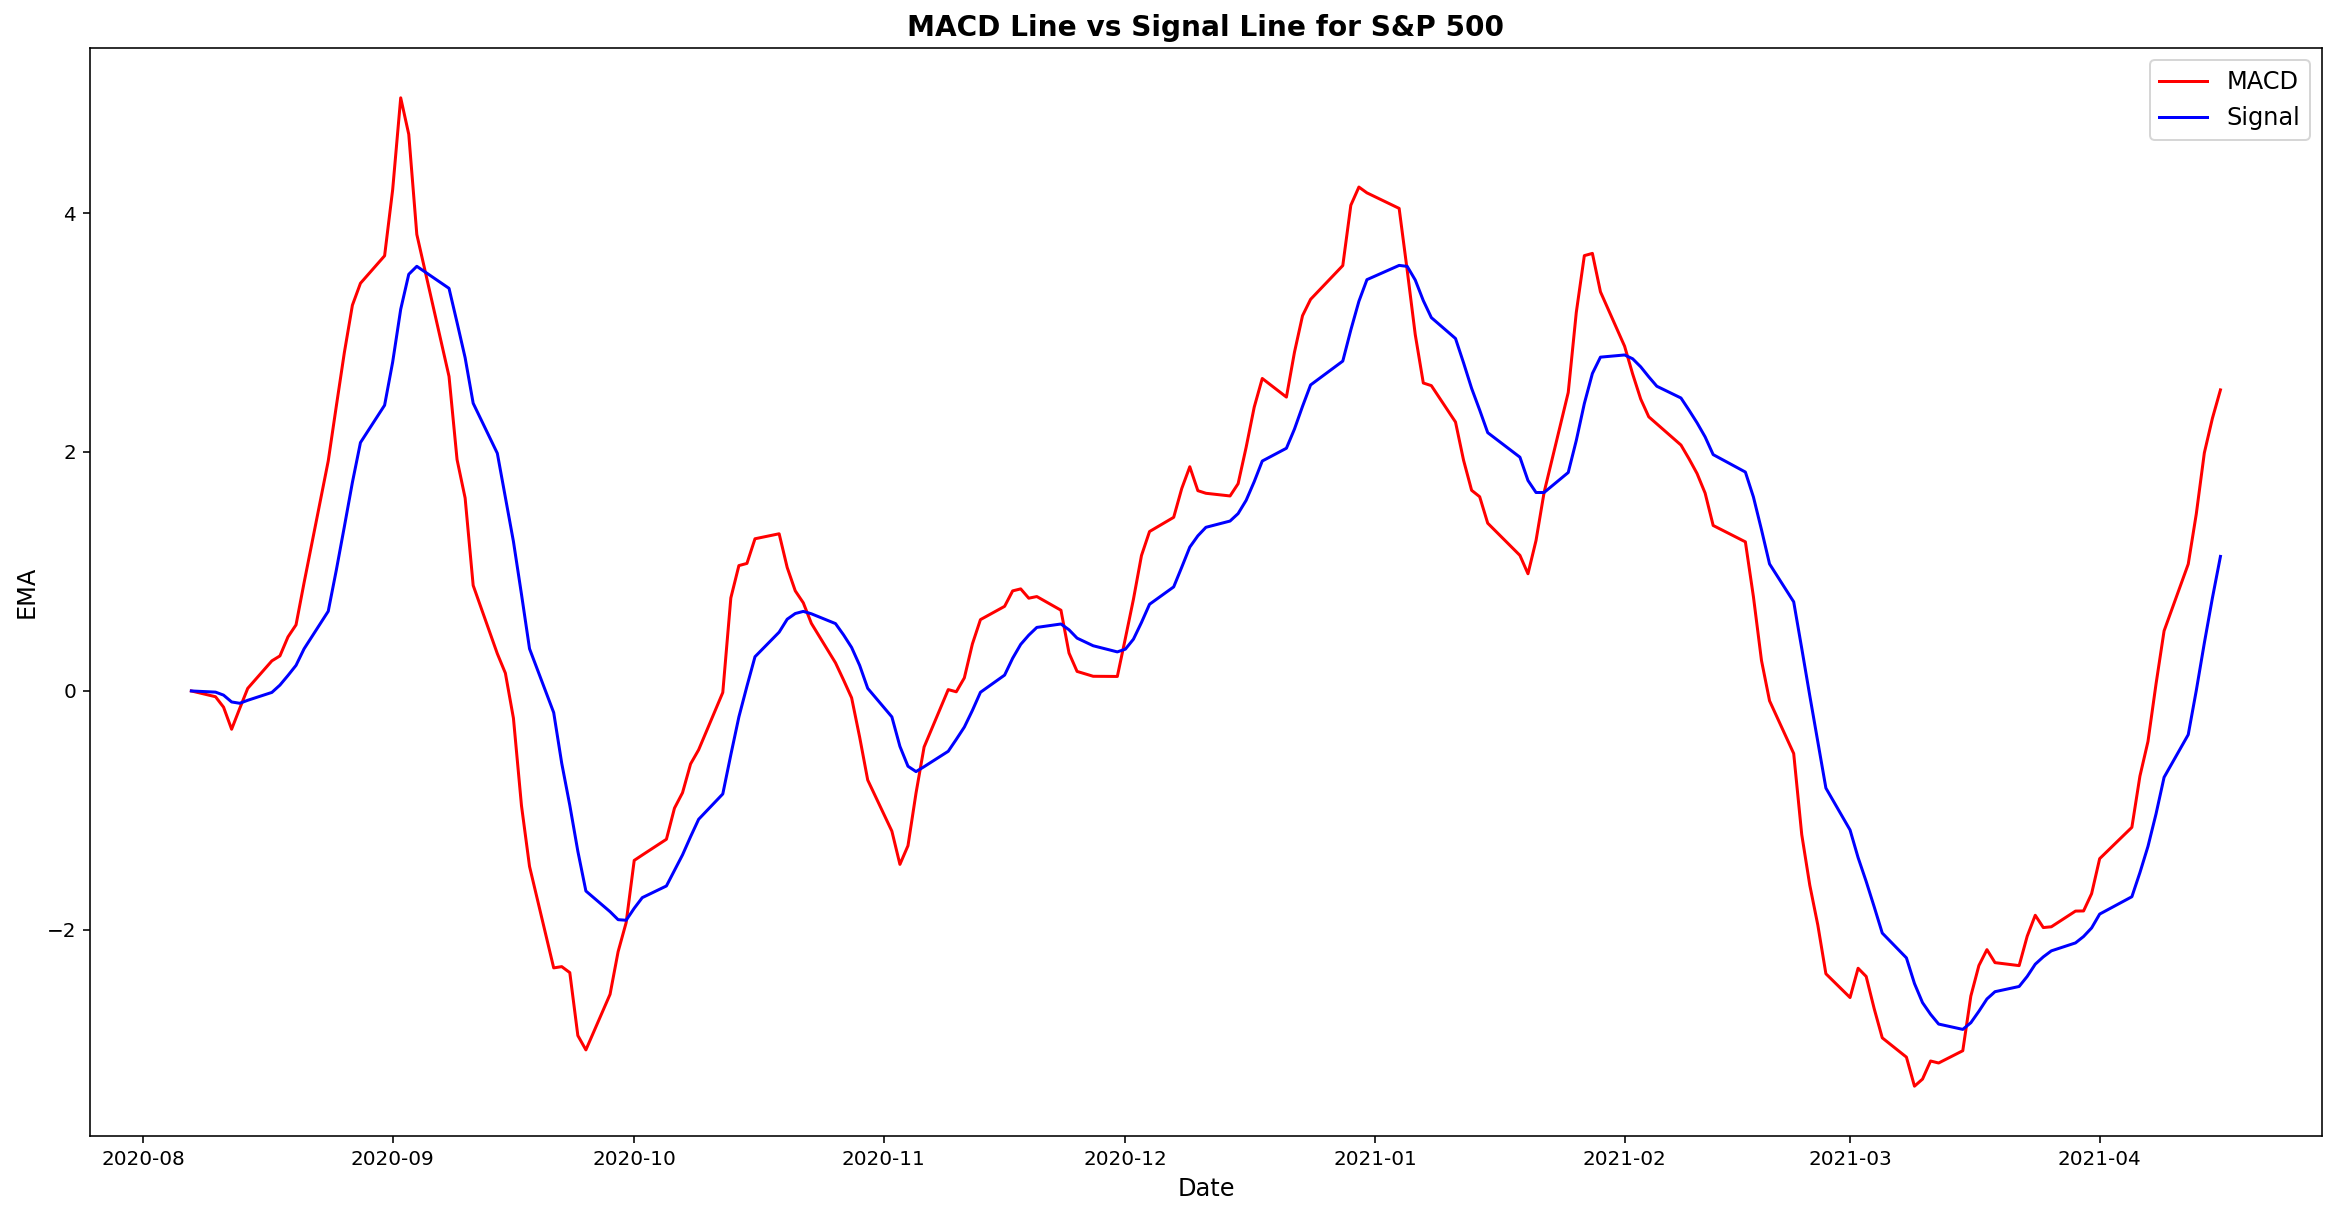

In [45]:
plt.figure(figsize=(20,10))
# plt.xticks(rotation=45)
plt.plot(df.index, macd, label="MACD", color="red")
plt.plot(df.index, signal, label="Signal", color="blue")

plt.title('MACD Line vs Signal Line for S&P 500', fontsize = 14,  fontweight ="bold")
plt.xlabel('Date', fontsize = 12)
plt.ylabel('EMA', fontsize = 12)
plt.legend(loc="best", fontsize = 12)

plt.show()

In [46]:
df["MACD"] = macd
df["Signal"] = signal
df.head()

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal
Date,,,,,,,,
2020-08-07,113.675003,110.292503,113.205002,111.112503,198045600.0,110.755638,0.000000,0.000000
2020-08-10,113.775002,110.000000,112.599998,112.727501,212403600.0,112.365448,-0.048262,-0.009652
2020-08-11,112.482498,109.107498,111.970001,109.375000,187902400.0,109.023705,-0.135781,-0.034878
2020-08-12,113.275002,110.297501,110.497498,113.010002,165944800.0,112.647041,-0.320267,-0.091956
2020-08-13,116.042503,113.927498,114.430000,115.010002,210082000.0,114.640610,-0.147454,-0.103055


In [47]:
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0, len(signal)):
        if signal["MACD"][i] > signal["Signal"][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal["Open"][i])
                flag = 1
            else:
                Buy.append(np.nan)
                
        elif signal["MACD"][i] < signal["Signal"][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal["Open"][i])
                flag = 0
            else:
                Sell.append(np.nan)
                
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
            
    return(Buy, Sell)

In [48]:
a = buy_sell(df)
df["Buy_Signal_Price"] = a[0]
df["Sell_Signal_Price"]= a[1]


In [49]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2020-08-07,113.675003,110.292503,113.205002,111.112503,198045600.0,110.755638,0.000000,0.000000,NaN,NaN
2020-08-10,113.775002,110.000000,112.599998,112.727501,212403600.0,112.365448,-0.048262,-0.009652,NaN,112.599998
2020-08-11,112.482498,109.107498,111.970001,109.375000,187902400.0,109.023705,-0.135781,-0.034878,NaN,NaN
2020-08-12,113.275002,110.297501,110.497498,113.010002,165944800.0,112.647041,-0.320267,-0.091956,NaN,NaN
2020-08-13,116.042503,113.927498,114.430000,115.010002,210082000.0,114.640610,-0.147454,-0.103055,NaN,NaN


In [50]:
df[df["Buy_Signal_Price"].notnull() | df["Sell_Signal_Price"].notnull()]

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2020-08-10,113.775002,110.000000,112.599998,112.727501,212403600.0,112.365448,-0.048262,-0.009652,NaN,112.599998
2020-08-14,115.000000,113.044998,114.830002,114.907501,165565200.0,114.538445,0.021531,-0.078138,114.830002,NaN
2020-09-08,118.989998,112.680000,113.949997,112.820000,231366600.0,112.457649,2.632632,3.369624,NaN,113.949997
2020-10-01,117.720001,115.830002,117.639999,116.790001,116120400.0,116.414894,-1.418081,-1.818773,117.639999,NaN
2020-10-23,116.550003,114.279999,116.389999,115.040001,82572600.0,114.670517,0.566006,0.645948,NaN,116.389999
2020-11-06,119.199997,116.129997,118.320000,118.690002,114457900.0,118.512909,-0.469305,-0.633804,118.320000,NaN
2020-11-24,115.849998,112.589996,113.910004,115.169998,113874200.0,114.998154,0.317194,0.511844,NaN,113.910004
2020-12-01,123.470001,120.010002,121.010002,122.720001,128166800.0,122.536896,0.441121,0.349774,121.010002,NaN
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.814514,3.521188,3.553468,NaN,128.889999


In [51]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2021-04-12,132.850006,130.630005,132.520004,131.240005,91420000.0,131.240005,1.061871,-0.365625,NaN,NaN
2021-04-13,134.660004,131.929993,132.440002,134.429993,91266500.0,134.429993,1.481489,0.003798,NaN,NaN
2021-04-14,135.000000,131.660004,134.940002,132.029999,87222800.0,132.029999,1.992797,0.401598,NaN,NaN
2021-04-15,135.000000,133.639999,133.820007,134.500000,89347100.0,134.500000,2.281340,0.777546,NaN,NaN
2021-04-16,134.669998,133.279999,134.300003,134.160004,84818500.0,134.160004,2.519698,1.125976,NaN,NaN


/Users/Reinhard/opt/anaconda3/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


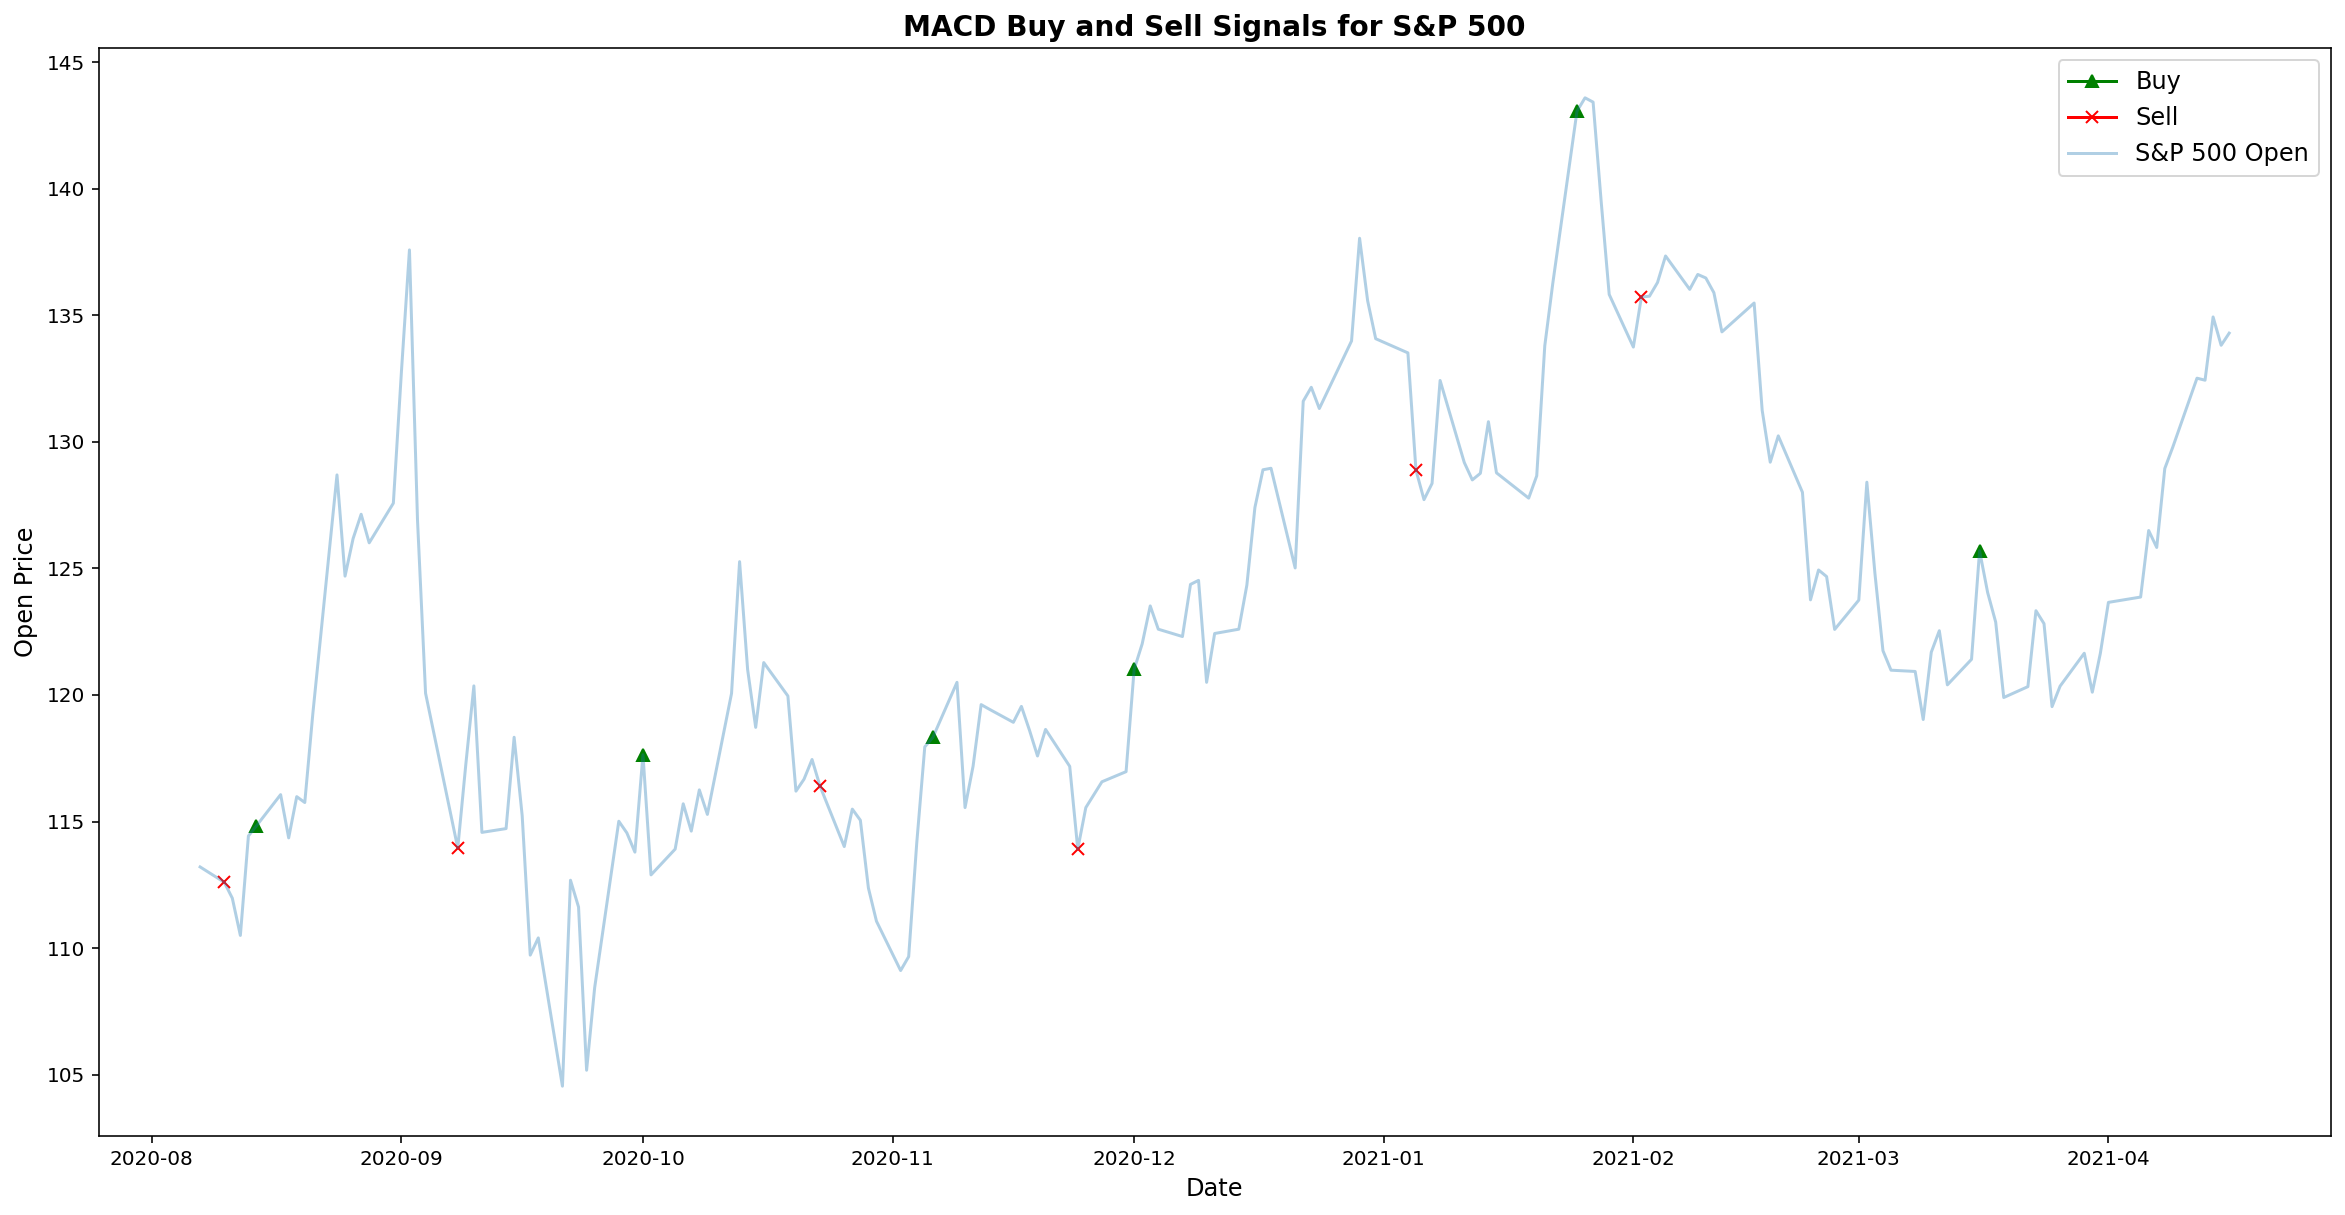

In [52]:
plt.figure(figsize=(20,10))
# plt.xticks(rotation=45)
plt.plot(df.index, df["Buy_Signal_Price"], label="Buy", color="green", marker="^")
plt.plot(df.index, df["Sell_Signal_Price"], label="Sell", color="red", marker="x")

plt.plot(df["Open"], label="S&P 500 Open", alpha=0.35)

plt.title('MACD Buy and Sell Signals for S&P 500', fontsize = 14,  fontweight ="bold")
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Open Price', fontsize = 12)
plt.legend(loc="best", fontsize = 12)
plt.show()

### Building the Agent

In [32]:
# Determine when to excecute the strategies
class MACD_Agent:
    
    def __init__(self, wallet):
        self.data = None
        self.wallet = wallet # Amount of cash in hand
        self.portfolio = 0 # Company stock count
        self.current_market = None
        self.history = [[[],[]],[[],[]]] # 1st arr: Buy history; 2nd arr: sell history. [date, price]
#         self.sma_diff = [] #
    
    # Check if the agent can buy the stock
    # Returns: Boolean. True if can buy, False if not
    def can_buy(self, unit):
        if unit == -1:
            if self.wallet >= self.current_market['Open']:
                return True
        else:
            if self.wallet >= unit*self.current_market['Open']:
                return True
        return False
    
    # Check if the agent can sell the stock
    # Returns: Boolean. True if can sell, False if not
    def can_sell(self, unit):
        if unit == -1:
            if self.portfolio > 0:
                return True
        else:
            if self.portfolio >= unit:
                return True
        return False
    
    # Buys x unit of stock. -1 to spend all
    def buy(self, unit):
        current_price = self.current_market['Open'] # price 1 stock
        # Update fields
        if unit == -1:
            unit = math.floor(self.wallet/current_price)
        self.wallet -= unit*current_price
        self.portfolio += unit
        self.history[0][0].append(self.current_market['Date'])
        self.history[0][1].append(current_price)
    
    # Sells x unit of stock. -1 to sell all
    def sell(self, unit):
        current_price = self.current_market['Open'] # price 1 stock
        # Update fields
        if unit == -1:
            unit = self.portfolio
        self.wallet += unit*current_price
        self.portfolio -= unit
        self.history[1][0].append(self.current_market['Date'])
        self.history[1][1].append(current_price)
    
    # Computes the total balance: wallet + holdings
    def total_balance(self):
        current_price = self.current_market['Open'] # price 1 stock
        return self.wallet + current_price*self.portfolio
    
    # Computes the "short Exponential Moving Average"
    def shortEMA(self):
        date = self.current_market.Date
        index = self.data.loc[self.data['Date'] == date].index[0]
        return self.data['Adj Close'].ewm(span=12, adjust=False).mean()[index]
    
    
    # Computes the "long Exponential Moving Average"
    def longEMA(self):
        date = self.current_market.Date
        index = self.data.loc[self.data['Date'] == date].index[0]
        return self.data['Open'].ewm(span=26, adjust=False).mean()[index]
    
    def MACD(self):
        return MACD_Agent.shortEMA(self) - MACD_Agent.longEMA(self)
    
    def signal(self):
        return MACD_Agent.MACD(self).ewm(span=9, adjust=False).mean() 
    
    # Defines the buying/selling strategy
    # Buy when MACD goes above Signal
    # Sell when MACD goes below Signal
    def strategy(self):
        # first iteration

        self.data["MACD"] = MACD_Agent.MACD(self)
        self.data["Signal"] = MACD_Agent.signal(self)
           
        Buy = []
        Sell = []
        flag = -1

        for i in range(0, len(self.data)):
            if self.data["MACD"][i] > self.data["Signal"][i]:
                Sell.append(np.nan)
                if flag != 1:
                    Buy.append(self.data["Open"][i])
                    flag = 1
                else:
                    Buy.append(np.nan)

            elif self.data["MACD"][i] < self.data["Signal"][i]:
                Buy.append(np.nan)
                if flag != 0:
                    Sell.append(self.data["Open"][i])
                    flag = 0
                else:
                    Sell.append(np.nan)

            else:
                Buy.append(np.nan)
                Sell.append(np.nan)

        return Buy, Sell
           
        
    # Given a dataframe computes the buy and sell signals
    def deploy(self, data):
        self.data = data.reset_index()
        for (idx, row) in self.data.iterrows():
            self.current_market = data.iloc[idx]
            if idx > 49: # first day where SMA50 is computed
                MACD_Agent.strategy(self)
        return self.history

### Run and Evaluate Bot

In [ ]:
# Inputs
invest = 1000
start_from = 2667
end_from = -1
data = df
# AAPL[start_from:end_from]

agent = MACD_Agent(invest)
# buy_info, sell_info = agent.deploy(data)
buy_info, sell_info = agent.strategy(data)

In [9]:
# Check performance
print('Invested:', invest)
print('End of day total balance:', agent.total_balance())
print('Percentage gain:', 100*(agent.total_balance()-invest)/invest, '%')

print()
print('Baseline:', 100*(data.iloc[-1].Open-data.iloc[0].Open)/data.iloc[0].Open, '%')

Invested: 1000
End of day total balance: 1455.4690710000002
Percentage gain: 45.54690710000002 %

Baseline: 9.154810178637618 %
